In [1]:
import flopy
import numpy as np
import matplotlib.pyplot as plt
import shutil
from pathlib import Path

from datetime import datetime

from tempfile import TemporaryDirectory
from tempfile import mkdtemp
import os
import platform
import subprocess

from shapely.geometry import Polygon, Point

In [260]:
myt = datetime.now().strftime('%m%d%H%M%S')
name = 'wasaga'
temp_dir = mkdtemp(prefix='_T{}_{}_'.format(myt,name))
os.makedirs(Path(temp_dir) / '_output')
model_ws = temp_dir


def open_file(path):
    if platform.system() == "Windows":
        os.startfile(path)
    elif platform.system() == "Darwin":
        subprocess.Popen(["open", path])
    else:
        subprocess.Popen(["xdg-open", path])
ws = model_ws
open_file(ws)

[189, 188, 187, 186]

[[(0, 0, 0), 190],
 [(1, 0, 0), 190],
 [(2, 0, 0), 190],
 [(3, 0, 0), 190],
 [(4, 0, 0), 190],
 [(5, 0, 0), 190],
 [(6, 0, 0), 190],
 [(7, 0, 0), 190],
 [(8, 0, 0), 190],
 [(9, 0, 0), 190],
 [(10, 0, 0), 190],
 [(11, 0, 0), 190],
 [(12, 0, 0), 190],
 [(13, 0, 0), 190],
 [(14, 0, 0), 190],
 [(15, 0, 0), 190],
 [(16, 0, 0), 190],
 [(17, 0, 0), 190],
 [(18, 0, 0), 190],
 [(19, 0, 0), 190],
 [(20, 0, 0), 190],
 [(21, 0, 0), 190],
 [(22, 0, 0), 190],
 [(23, 0, 0), 190],
 [(24, 0, 0), 190],
 [(25, 0, 0), 190],
 [(26, 0, 0), 190],
 [(27, 0, 0), 190],
 [(28, 0, 0), 190],
 [(29, 0, 0), 190],
 [(30, 0, 0), 190],
 [(31, 0, 0), 190],
 [(32, 0, 0), 190],
 [(33, 0, 0), 190],
 [(34, 0, 0), 190],
 [(35, 0, 0), 190],
 [(36, 0, 0), 190],
 [(37, 0, 0), 190],
 [(38, 0, 0), 190],
 [(39, 0, 0), 190],
 [(40, 0, 0), 190],
 [(41, 0, 0), 190],
 [(42, 0, 0), 190],
 [(43, 0, 0), 190],
 [(44, 0, 0), 190],
 [(45, 0, 0), 190],
 [(46, 0, 0), 190],
 [(47, 0, 0), 190],
 [(48, 0, 0), 190],
 [(49, 0, 0), 190],
 [(50, 0, 

In [ ]:
chd_1 = [[(lay,0,col),190] for col in range(220)for lay in range(60)] 
chd_2 = [[(lay,219,col),170] for col in range(220)for lay in range(60)]

chd_1 +chd_2

In [310]:
name = 'mymodel'
sim = flopy.mf6.MFSimulation(sim_name=name, sim_ws=ws, exe_name='mf6')
tdis = flopy.mf6.ModflowTdis(sim)
ims = flopy.mf6.ModflowIms(sim,complexity='MODERATE')
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, save_flows=True)
dis = flopy.mf6.ModflowGwfdis(gwf, nrow=220, ncol=220,nlay=60,top=190,
                              botm=[190-i*0.5 for i in range(1,60+1)])
ic = flopy.mf6.ModflowGwfic(gwf)
npf = flopy.mf6.ModflowGwfnpf(gwf, save_specific_discharge=True,k=2.4)



chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, 0, 0), 291.],
                                                       [(0, 40, 40), 189]])
budget_file = name + '.bud'
head_file = name + '.hds'
oc = flopy.mf6.ModflowGwfoc(gwf,
                            budget_filerecord=budget_file,
                            head_filerecord=head_file,
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])




In [311]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model mymodel...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 2 based on size of stress_period_data
    writing package oc...
FloPy is using the following executable to run the model: ../../../../../../Users/b/.local/share/flopy/bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Apr 12 2023 19:02:02 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Altho

(True, [])

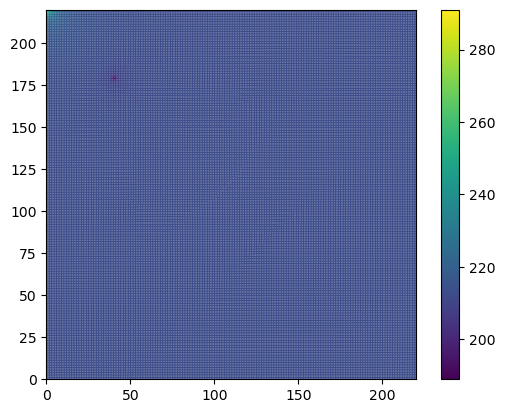

In [313]:
head = gwf.output.head().get_data()
bud = gwf.output.budget()

spdis = bud.get_data(text='DATA-SPDIS')[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
pmv = flopy.plot.PlotMapView(gwf)
im = pmv.plot_array(head)
#pmv.plot_grid(colors='white')
#pmv.contour_array(head, levels=[.2, .4, .6, .8], linewidths=3.)
pmv.plot_vector(qx, qy, normalize=True, color="white")

plt.colorbar(im)